Task 1: Load the League of Legends dataset and preprocess it for training.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

!wget -O league_of_legends_data_large.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv

# Load the dataset
data = pd.read_csv('league_of_legends_data_large.csv')

# Preprocess the data
X = data.drop('win', axis=1)
y = data['win']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
print("Data loading, splitting, and standardization complete.")

--2024-12-01 14:20:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29451 (29K) [text/csv]
Saving to: ‘league_of_legends_data_large.csv’

league_of_legends_d 100%[===================>]  28.76K  --.-KB/s    in 0.02s   

2024-12-01 14:20:35 (1.76 MB/s) - ‘league_of_legends_data_large.csv’ saved [29451/29451]

Data loading, splitting, and standardization complete.


Task 2: Implement a logistic regression model using PyTorch.

In [18]:
import torch.nn as nn
import torch.optim as optim

# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Task 3: Train the logistic regression model on the dataset.

In [19]:
# Training the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model evaluation
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train).detach()
    y_pred_test = model(X_test).detach()

train_accuracy = ((y_pred_train > 0.5) == y_train).float().mean()
test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch [100/1000], Loss: 0.7144
Epoch [200/1000], Loss: 0.7031
Epoch [300/1000], Loss: 0.6961
Epoch [400/1000], Loss: 0.6919
Epoch [500/1000], Loss: 0.6893
Epoch [600/1000], Loss: 0.6877
Epoch [700/1000], Loss: 0.6868
Epoch [800/1000], Loss: 0.6862
Epoch [900/1000], Loss: 0.6858
Epoch [1000/1000], Loss: 0.6856
Train Accuracy: 0.5412
Test Accuracy: 0.5050


Task 4: Implement optimization techniques and evaluate the model's performance.

In [20]:
# Implementing L2 regularization (Ridge Regression)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Retrain the model with L2 regularization
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the optimized model
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train).detach()
    y_pred_test = model(X_test).detach()

train_accuracy = ((y_pred_train > 0.5) == y_train).float().mean()
test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch [100/1000], Loss: 0.6855
Epoch [200/1000], Loss: 0.6854
Epoch [300/1000], Loss: 0.6854
Epoch [400/1000], Loss: 0.6853
Epoch [500/1000], Loss: 0.6853
Epoch [600/1000], Loss: 0.6853
Epoch [700/1000], Loss: 0.6853
Epoch [800/1000], Loss: 0.6853
Epoch [900/1000], Loss: 0.6853
Epoch [1000/1000], Loss: 0.6853
Train Accuracy: 0.5450
Test Accuracy: 0.5050


Task 5:
Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.

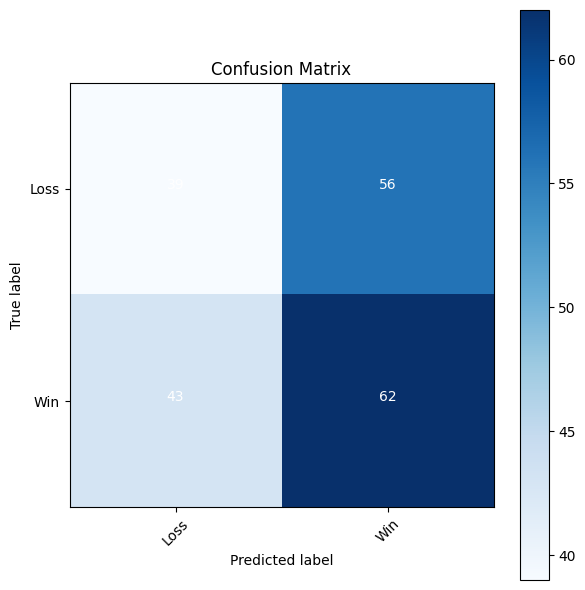

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Classification Report:
               precision    recall  f1-score   support

        Loss       0.48      0.41      0.44        95
         Win       0.53      0.59      0.56       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



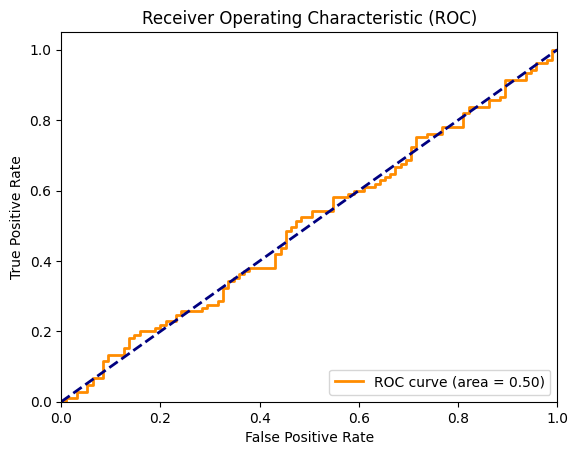

In [23]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Task 6: Save and load the trained model.

In [24]:
# Save the model
torch.save(model.state_dict(), 'logistic_regression_model.pth')

# Load the model
loaded_model = LogisticRegressionModel(input_dim)
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))

# Ensure the loaded model is in evaluation mode
loaded_model.eval()

# Evaluate the loaded model
with torch.no_grad():
    y_pred_test_loaded = loaded_model(X_test).detach()
    loaded_test_accuracy = ((y_pred_test_loaded > 0.5) == y_test).float().mean()
    print(f'Loaded Model Test Accuracy: {loaded_test_accuracy:.4f}')

Loaded Model Test Accuracy: 0.5050


<ipython-input-24-d9bbada3d04e>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))


Task 7: Perform hyperparameter tuning to find the best learning rate.

In [25]:
learning_rates = [0.01, 0.05, 0.1]
best_accuracy = 0
best_lr = 0

for lr in learning_rates:
    # Reinitialize the model and optimizer for each learning rate
    model = LogisticRegressionModel(input_dim)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Training the model
    epochs = 1000
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Learning Rate: {lr}, Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test).detach()
        test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()
        print(f'Learning Rate: {lr}, Test Accuracy: {test_accuracy:.4f}')

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_lr = lr

print(f'Best Learning Rate: {best_lr}, Best Test Accuracy: {best_accuracy:.4f}')

Learning Rate: 0.01, Epoch [100/1000], Loss: 0.7237
Learning Rate: 0.01, Epoch [200/1000], Loss: 0.7098
Learning Rate: 0.01, Epoch [300/1000], Loss: 0.7007
Learning Rate: 0.01, Epoch [400/1000], Loss: 0.6948
Learning Rate: 0.01, Epoch [500/1000], Loss: 0.6912
Learning Rate: 0.01, Epoch [600/1000], Loss: 0.6889
Learning Rate: 0.01, Epoch [700/1000], Loss: 0.6875
Learning Rate: 0.01, Epoch [800/1000], Loss: 0.6866
Learning Rate: 0.01, Epoch [900/1000], Loss: 0.6861
Learning Rate: 0.01, Epoch [1000/1000], Loss: 0.6858
Learning Rate: 0.01, Test Accuracy: 0.5100
Learning Rate: 0.05, Epoch [100/1000], Loss: 0.6942
Learning Rate: 0.05, Epoch [200/1000], Loss: 0.6860
Learning Rate: 0.05, Epoch [300/1000], Loss: 0.6853
Learning Rate: 0.05, Epoch [400/1000], Loss: 0.6853
Learning Rate: 0.05, Epoch [500/1000], Loss: 0.6853
Learning Rate: 0.05, Epoch [600/1000], Loss: 0.6852
Learning Rate: 0.05, Epoch [700/1000], Loss: 0.6852
Learning Rate: 0.05, Epoch [800/1000], Loss: 0.6852
Learning Rate: 0.05,

Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.

In [26]:
# Extract the weights of the linear layer
weights = model.linear.weight.data.numpy().flatten()
features = X.columns

In [27]:
# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

        Feature  Importance
3   gold_earned    0.175341
0         kills    0.130975
5  wards_placed    0.106087
1        deaths   -0.005131
4            cs   -0.007268
2       assists   -0.013663
7  damage_dealt   -0.018873
6  wards_killed   -0.034605


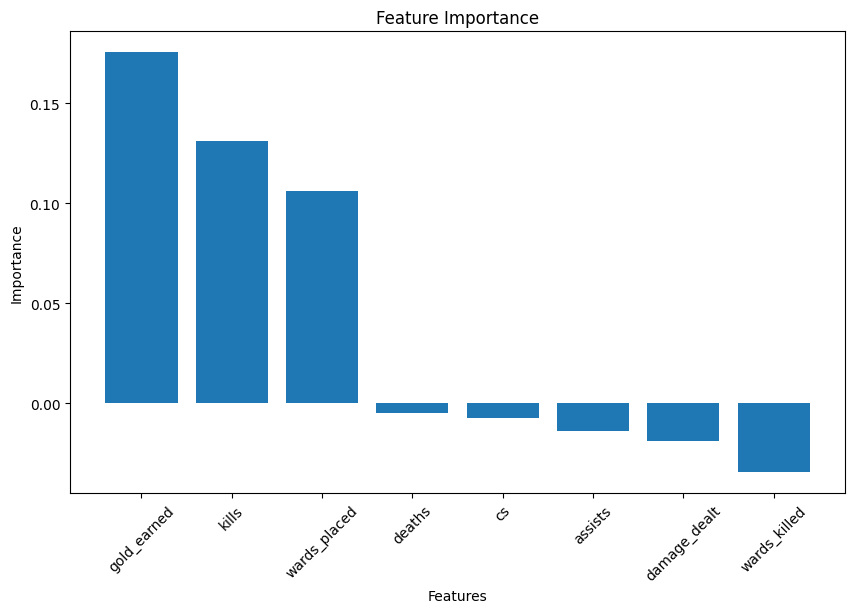

In [28]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()